# **1. Import Library**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# **2. Memuat Dataset dari Hasil Clustering**

In [24]:
url = 'https://raw.githubusercontent.com/DickySaragih/Submission_BMLP/refs/heads/main/clustering_result.csv'
df = pd.read_csv(url)

# **3. Data splitting**

In [25]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [26]:
print(X.head())
print(X.info())
print(X.describe())
print(y.value_counts())


   symbol  account  type          2020          2021          2022  \
0       0        0     0  7.702640e+11  1.026717e+12  1.224423e+12   
1       0        1     0  7.658490e+11  4.581350e+11  8.487700e+11   
2       0        2     0 -1.092095e+13 -1.213381e+13 -1.330375e+13   
3       0        3     0  3.878995e+12  3.878995e+12  3.878995e+12   
4       0        4     0 -2.426100e+10 -2.454300e+10 -2.705700e+10   

           2023  Cluster      PCA1  
0  8.420640e+11        0 -0.055724  
1  6.744870e+11        0 -0.087542  
2 -1.443685e+13        0 -1.638410  
3  3.878995e+12        0  0.285904  
4 -2.651600e+10        0 -0.170797  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89243 entries, 0 to 89242
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   symbol   89243 non-null  int64  
 1   account  89243 non-null  int64  
 2   type     89243 non-null  int64  
 3   2020     89243 non-null  float64
 4   2021     89243 n

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**
1. K-Nearest Neighbors (KNN)
2. Decision Tree

In [37]:
#d Pembagian data Testing dan Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (62470, 9)
y_train shape: (62470,)
X_test shape: (26773, 9)
y_test shape: (26773,)


In [53]:
# Model KNN hasil Training


knn_model = KNeighborsClassifier(n_neighbors=5) # Anda dapat mengubah nilai n_neighbors

knn_model.fit(X_train, y_train)

# Evaluasi model dengan akurasi pada data training
train_accuracy = knn_model.score(X_train, y_train)
print(f"Akurasi Training KNN: {train_accuracy}")


Akurasi Training KNN: 0.99886345445814


In [60]:
# Model Decision tree hasil training
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

dt_model.fit(X_train, y_train)

# Evaluasi model dengan akurasi pada data training
train_accuracy = dt_model.score(X_train, y_train)
print(f"Akurasi Training Decision Tree: {train_accuracy}")


Akurasi Training Decision Tree: 0.9986713622538819


## **b. Evaluasi Model Klasifikasi**

In [61]:
# Model KNN hasil Testing
y_test = y_test.astype(int)

y_pred_knn = knn_model.predict(X_test)

# Evaluasi model dengan akurasi pada data Testing
test_accuracy_knn = knn_model.score(X_test, y_test)
print(f"Akurasi Testing KNN: {test_accuracy_knn}")

Akurasi Testing KNN: 0.9983192021813021


In [62]:
# Model Decison tree hasil Training


y_pred_dt = dt_model.predict(X_test)

# Evaluasi model dengan akurasi pada data testing
test_accuracy_dt = dt_model.score(X_test, y_test)
print(f"Akurasi Testing Decision Tree: {test_accuracy_dt}")


Akurasi Testing Decision Tree: 0.9981324468681134


In [63]:
# Model KNN hasil Testing
y_test = y_test.astype(int)
y_pred_knn = knn_model.predict(X_test)

# Confusion Matrix dan F1-score untuk KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Model Decision Tree hasil Testing
y_pred_dt = dt_model.predict(X_test)

# Confusion Matrix dan F1-score untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Membuat dictionary untuk menyimpan hasil evaluasi
evaluation_results = {
    'KNN': {
        'confusion_matrix': cm_knn,
        'f1_score': f1_knn
    },
    'Decision Tree': {
        'confusion_matrix': cm_dt,
        'f1_score': f1_dt
    }
}

print(evaluation_results)

# Print classification reports for more detailed evaluation
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))


{'KNN': {'confusion_matrix': array([[    0,     0,     0,     0,     0,     0,     1,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     1,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     1,     0,     0,     0,     0,     1,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     1,     2,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     1,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     1,    14,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     2,     0, 26703,     1,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     9,    20,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

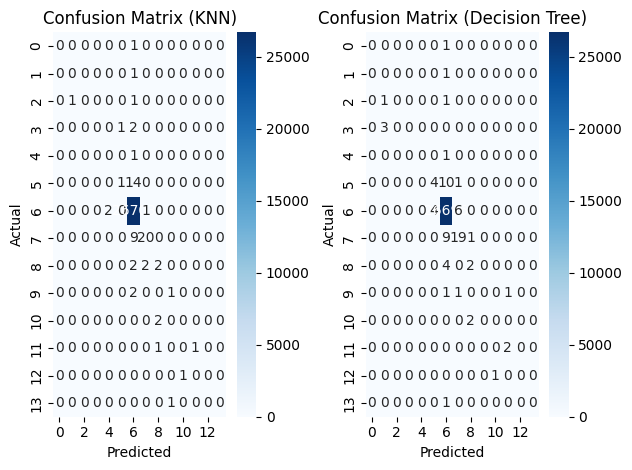

In [71]:
plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")


plt.tight_layout()
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Tuning Hyperparameter
- Meskipun Decision Tree sudah menunjukkan performa yang baik, optimasi lebih lanjut terhadap hyperparameter seperti max_depth, min_samples_split, dan min_samples_leaf dapat dilakukan menggunakan GridSearchCV atau RandomizedSearchCV untuk meningkatkan akurasi.

- Hal yang sama juga berlaku untuk model KNN dengan hyperparameter n_neighbors, yang dapat disesuaikan untuk meningkatkan performa model.

2. Eksplorasi Model Lain
- Pertimbangkan untuk menguji model lain seperti Random Forest, Support Vector Machine (SVM), atau Naïve Bayes untuk mengetahui apakah ada model yang lebih sesuai dengan data dan memberikan hasil yang lebih baik.

3. Analisis Fitur
- Lakukan analisis lebih lanjut terhadap fitur-fitur yang digunakan untuk mengidentifikasi apakah ada fitur yang kurang relevan atau redundan.

- Penghapusan fitur yang tidak penting dapat meningkatkan performa model.

- Teknik seperti Feature Importance pada Decision Tree atau analisis korelasi antar fitur dapat membantu dalam proses ini.

4. Penanganan Ketidakseimbangan Data
- Jika distribusi kelas pada data hasil clustering tidak seimbang (misalnya, ada kelas dengan jumlah sampel yang jauh lebih banyak dibandingkan kelas lainnya), gunakan teknik seperti oversampling (SMOTE) atau undersampling untuk meningkatkan performa model pada kelas minoritas.

5. Validasi Silang (Cross-Validation)
Gunakan metode cross-validation (misalnya, k-fold cross-validation) untuk mendapatkan estimasi performa model yang lebih stabil dan mengurangi variabilitas dalam hasil evaluasi.

6. Evaluasi Metrik Lainnya

- Selain akurasi dan F1-score, pertimbangkan metrik evaluasi lainnya seperti precision, recall, dan AUC-ROC.

- Hal ini sangat penting jika terdapat ketidakseimbangan kelas, karena dapat memberikan gambaran performa model yang lebih komprehensif.

